#### 간단한 모델링

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split

# 사용자정의 함수: key를 입력하면 해당 데이터를 데이터프레임으로 읽어옴
from aiddd.data_manager import read_data, write_data
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred

plt_settings()

In [2]:
df_data = read_data('병합 전체카운트')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   공사번호     5810 non-null   int64 
 1   최초등록자사번  5810 non-null   object
 2   최종변경자사번  5810 non-null   object
 3   총공사비     5810 non-null   int64 
 4   최초등록일시   5810 non-null   object
 5   최종변경일시   5810 non-null   object
 6   공사형태코드   5810 non-null   int64 
 7   공사형태명    5810 non-null   object
 8   계약전력     5810 non-null   int64 
 9   기별:애자    5810 non-null   int64 
 10  기별:인입선   5810 non-null   int64 
 11  기별:장주    5810 non-null   int64 
 12  기별:전선    5810 non-null   int64 
 13  기별:전주    5810 non-null   int64 
 14  기별:접지    5810 non-null   int64 
 15  기별:지지선   5810 non-null   int64 
 16  설계:고객    5810 non-null   int64 
 17  설계:애자    5810 non-null   int64 
 18  설계:인입선   5810 non-null   int64 
 19  설계:장주    5810 non-null   int64 
 20  설계:전선    5810 non-null   int64 
 21  설계:전주    5810 non-null   int64 
 22  

In [4]:
# 기별 및 설계에서 전주 갯 수가 15개 미만인 대상 추출
df_data_bd15 = df_data[df_data['기별:전주']<15].copy()
df_data_ds15 = df_data[df_data['설계:전주']<15].copy()

In [5]:
object_cols = ['최초등록자사번', '최종변경자사번', '최초등록일시', '최종변경일시', '공사형태명']
df_data_bd15.drop(columns=object_cols, axis=1, inplace=True)
df_data_ds15.drop(columns=object_cols, axis=1, inplace=True)

In [6]:
not_bd_cols = [col for col in df_data_bd15 if '설계:' in col]
not_ds_cols = [col for col in df_data_ds15 if '기별:' in col]

In [7]:
_ = [df_data_bd15.pop(col) for col in not_bd_cols]
_ = [df_data_ds15.pop(col) for col in not_ds_cols]

In [8]:
df_label_bd15 = df_data_bd15.pop('총공사비')
df_label_ds15 = df_data_ds15.pop('총공사비')

In [9]:
feature_cols_name_bd = df_data_bd15.columns

In [10]:
X_bd15_train, X_bd15_test, y_bd15_train, y_bd15_test = \
    train_test_split(df_data_bd15, df_label_bd15, test_size=0.2)
X_ds15_train, X_ds15_test, y_ds15_train, y_ds15_test = \
    train_test_split(df_data_ds15, df_label_ds15, test_size=0.2)

In [11]:
model_dtr_bd = DecisionTreeRegressor()
model_dtr_bd.fit(X_bd15_train, y_bd15_train)
pred_dtr_bd = model_dtr_bd.predict(X_bd15_test)
_ = regression_evaluation(y_bd15_test, pred_dtr_bd)

R2_SCORE: 0.041269, MAPE2: 44.007111, MSE: 50541197610176.617188, RMSE: 7109233.264578, MAPE: 2.959549, MAE: 2775703.552066


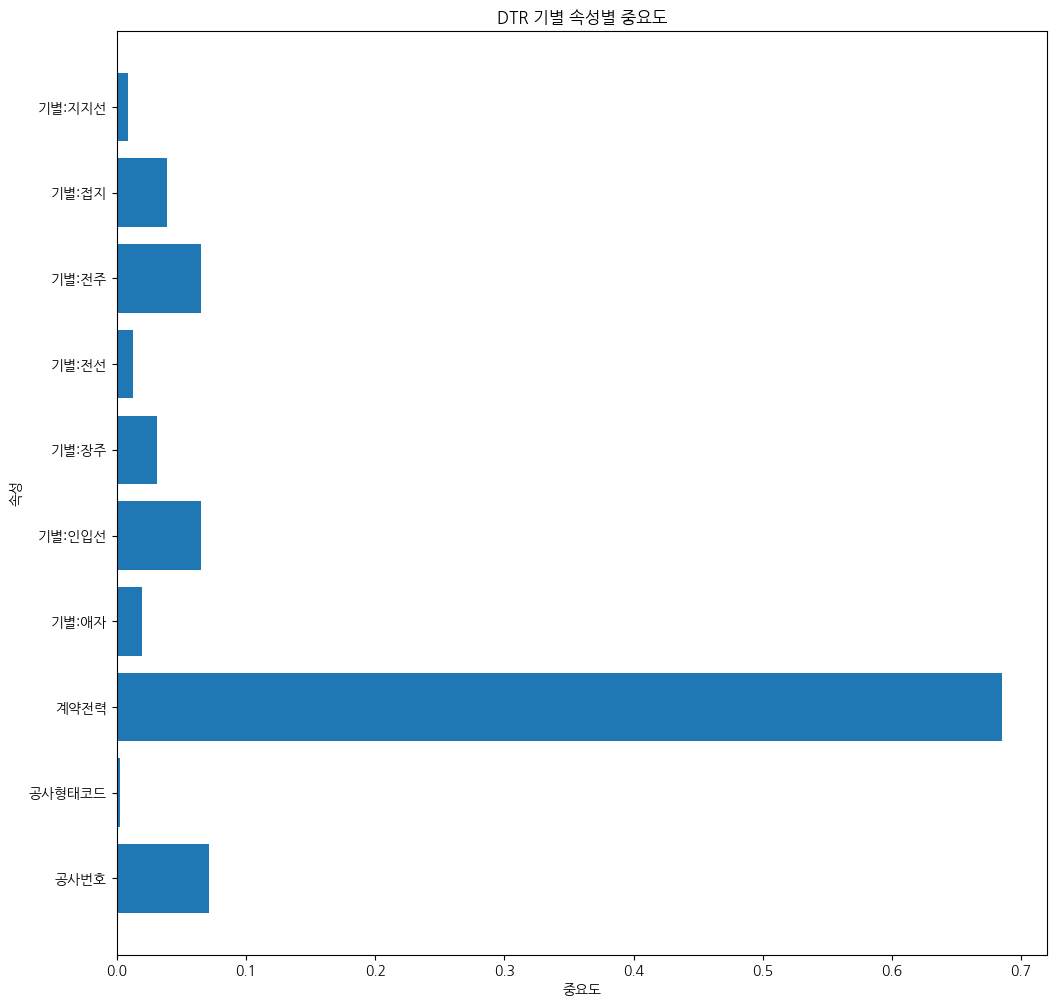

In [12]:
f_importances(model_dtr_bd, feature_cols_name_bd, 'DTR 기별')

In [13]:
model_dtr_ds = DecisionTreeRegressor()
model_dtr_ds.fit(X_ds15_train, y_ds15_train)
pred_dtr_ds = model_dtr_ds.predict(X_ds15_test)
_ = regression_evaluation(y_ds15_test, pred_dtr_ds)

R2_SCORE: 0.393073, MAPE2: 37.980936, MSE: 37068450348540.804688, RMSE: 6088386.514385, MAPE: 3.062949, MAE: 2427994.933053


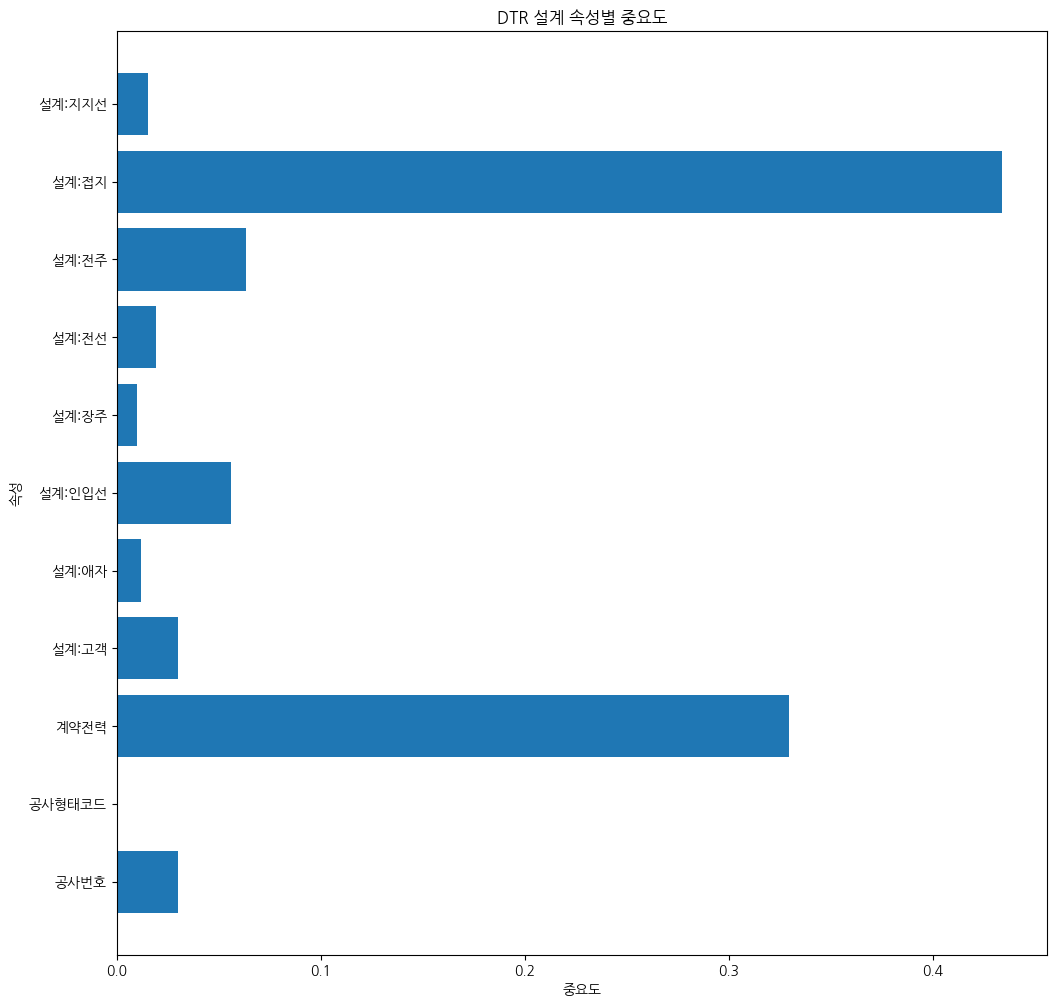

In [14]:
feature_cols_name_ds = df_data_ds15.columns
f_importances(model_dtr_ds, feature_cols_name_ds, 'DTR 설계')

In [15]:
SEED = 123

In [16]:
model_rfr_bd = RandomForestRegressor(
    n_estimators=500, n_jobs=-1, random_state=SEED
)
model_rfr_bd.fit(X_bd15_train, y_bd15_train)
pred_rfr_bd = model_rfr_bd.predict(X_bd15_test)
_ = regression_evaluation(y_bd15_test, pred_dtr_bd)

R2_SCORE: 0.041269, MAPE2: 44.007111, MSE: 50541197610176.617188, RMSE: 7109233.264578, MAPE: 2.959549, MAE: 2775703.552066


In [17]:
model_rfr_ds = RandomForestRegressor(
    n_estimators=500, n_jobs=-1, random_state=SEED
)
model_rfr_ds.fit(X_ds15_train, y_ds15_train)
pred_rfr_ds = model_rfr_ds.predict(X_ds15_test)
_ = regression_evaluation(y_ds15_test, pred_dtr_ds)

R2_SCORE: 0.393073, MAPE2: 37.980936, MSE: 37068450348540.804688, RMSE: 6088386.514385, MAPE: 3.062949, MAE: 2427994.933053


In [18]:
model_gbr_bd = GradientBoostingRegressor()
model_gbr_bd.fit(X_bd15_train, y_bd15_train)
pred_gbr_bd = model_gbr_bd.predict(X_bd15_test)
_ = regression_evaluation(y_bd15_test, pred_gbr_bd)

R2_SCORE: 0.289896, MAPE2: 52.223310, MSE: 37434371365173.765625, RMSE: 6118363.454812, MAPE: 3.521110, MAE: 2612971.189968


In [19]:
model_gbr_ds = GradientBoostingRegressor()
model_gbr_ds.fit(X_ds15_train, y_ds15_train)
pred_gbr_ds = model_gbr_ds.predict(X_ds15_test)
_ = regression_evaluation(y_ds15_test, pred_gbr_ds)

R2_SCORE: 0.571435, MAPE2: 46.095416, MSE: 26174891030522.539062, RMSE: 5116140.247347, MAPE: 1.794841, MAE: 2359570.602069


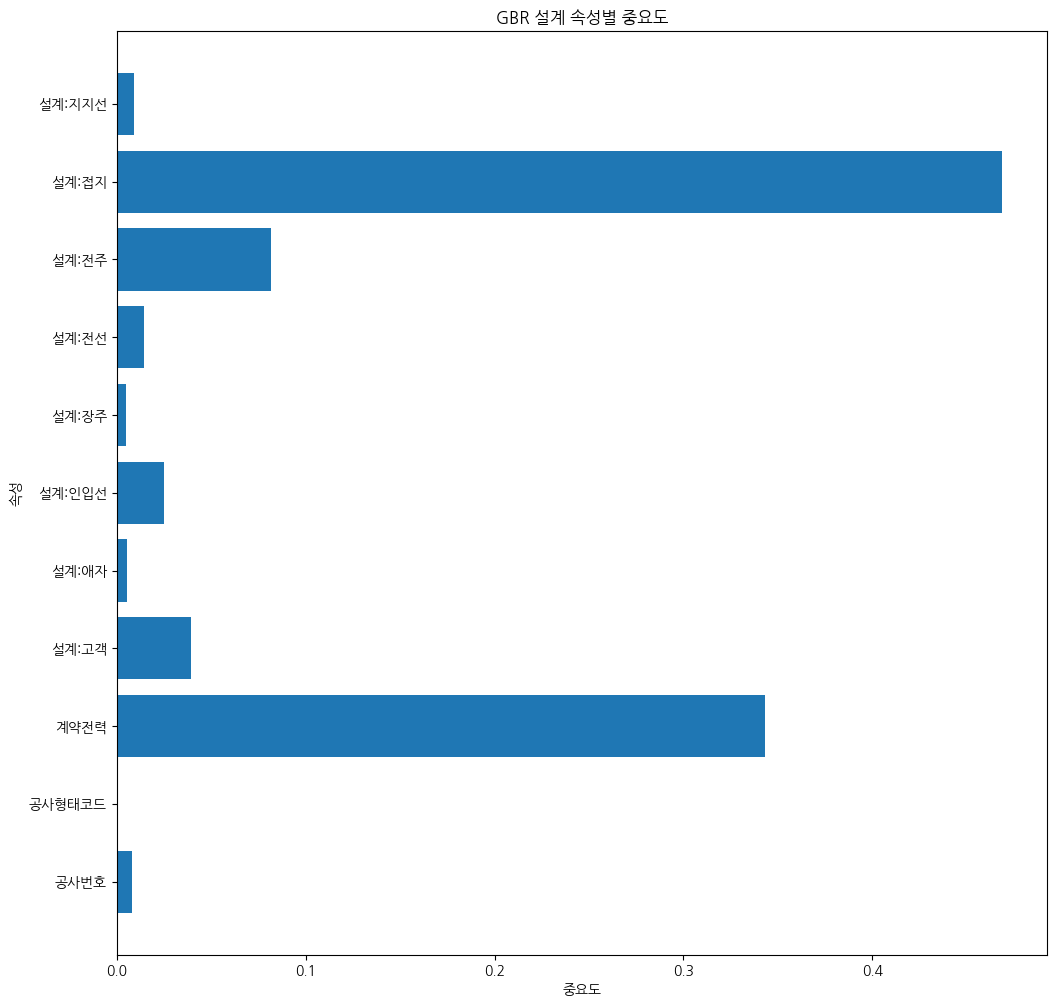

In [25]:
f_importances(model_gbr_ds, feature_cols_name_ds, 'GBR 설계')

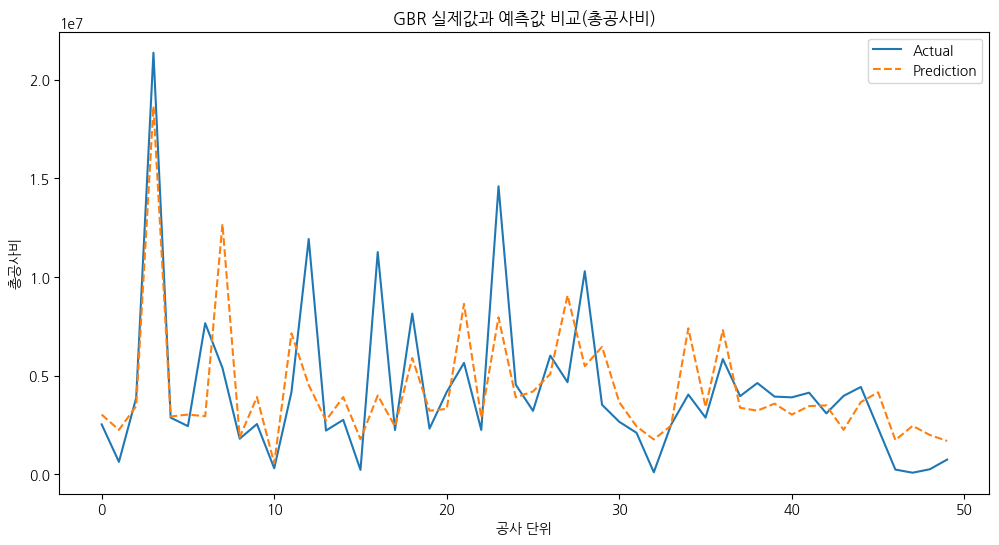

In [24]:
plot_actual_pred(y_ds15_test[300:350], pred_gbr_ds[300:350], 'GBR 실제값과 예측값 비교(총공사비)')